## Part 1 : Data Processing

### 1.1 Reading in Lyrics dataset

Data Source is an already scraped lyrics dataset from azlyrics.  
- __Source:__ https://www.kaggle.com/datasets/albertsuarez/azlyrics  
    - created using this code: https://github.com/AlbertSuarez/azlyrics-scraper/tree/master
- __Date:__ latest as of Jan 31, 2020.

In [265]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For web scraping
import requests
from bs4 import BeautifulSoup

# For adding delays so that we don't spam requests
import time

In [200]:
#special libraries for installation
#from textblob import TextBlob
import langid
#test of library
langid.classify("hi there")

('en', -19.429729461669922)

In [2]:
#Load in lyrics files

#Lyrics is split into files by first letter, so we stitch them together
df= pd.read_csv("./azlyrics-scraper/azlyrics_lyrics_a.csv",quotechar='"',usecols=range(5),nrows=0)

#loop through each file to add it to the main dataframe
for filename in os.listdir('azlyrics-scraper/'):
    print(filename)
    df_temp = pd.read_csv(os.path.join('azlyrics-scraper/', filename),quotechar='"',usecols=range(5))
    df = pd.concat([df,df_temp])
print ("Loaded!")

azlyrics_lyrics_19.csv
azlyrics_lyrics_g.csv
azlyrics_lyrics_p.csv
azlyrics_lyrics_q.csv
azlyrics_lyrics_f.csv
azlyrics_lyrics_d.csv
azlyrics_lyrics_s.csv
azlyrics_lyrics_r.csv
azlyrics_lyrics_e.csv
azlyrics_lyrics_v.csv
azlyrics_lyrics_a.csv
azlyrics_lyrics_w.csv
azlyrics_lyrics_u.csv
azlyrics_lyrics_b.csv
azlyrics_lyrics_c.csv
azlyrics_lyrics_t.csv
azlyrics_lyrics_y.csv
azlyrics_lyrics_n.csv
azlyrics_lyrics_o.csv
azlyrics_lyrics_x.csv
azlyrics_lyrics_z.csv
azlyrics_lyrics_m.csv
azlyrics_lyrics_l.csv
azlyrics_lyrics_h.csv
azlyrics_lyrics_i.csv
azlyrics_lyrics_k.csv
azlyrics_lyrics_j.csv
Loaded!


In [3]:
#Look at results
df

,ARTIST_NAME,ARTIST_URL,SONG_NAME,SONG_URL,LYRICS
0,03 greedo,https://www.azlyrics.com/19/03greedo.html,sweet lady,https://www.azlyrics.com/lyrics/03greedo/sweet...,"its only one, 03, i'm from grape street, where..."
1,03 greedo,https://www.azlyrics.com/19/03greedo.html,mafia business,https://www.azlyrics.com/lyrics/03greedo/mafia...,"you gonna make me put you in a suit and tie, s..."
2,03 greedo,https://www.azlyrics.com/19/03greedo.html,paranoid,https://www.azlyrics.com/lyrics/03greedo/paran...,"we could kill it, yeah, we could, we could, we..."
3,03 greedo,https://www.azlyrics.com/19/03greedo.html,never bend,https://www.azlyrics.com/lyrics/03greedo/never...,"yeah, you lil bitch ass niggas steady speaking..."
4,03 greedo,https://www.azlyrics.com/19/03greedo.html,prayer for my lost,https://www.azlyrics.com/lyrics/03greedo/praye...,"x loaded up bro, never see me in the church, p..."
...,...,...,...,...,...
11970,jory boy,https://www.azlyrics.com/j/joryboy.html,por que cambiar,https://www.azlyrics.com/lyrics/joryboy/porque...,", los evos jedis, no entiendo como, esto suced..."
11971,jory boy,https://www.azlyrics.com/j/joryboy.html,imposible amor,https://www.azlyrics.com/lyrics/joryboy/imposi...,"yo se que lo que tuvimos anoche te gusto, echa..."
11972,jory boy,https://www.azlyrics.com/j/joryboy.html,bonita,https://www.azlyrics.com/lyrics/joryboy/bonita...,", dice, matando la liga baby, jory boy, baby d..."
11973,jory boy,https://www.azlyrics.com/j/joryboy.html,no me condenes,https://www.azlyrics.com/lyrics/joryboy/nomeco...,", no se lo que te sucedio, quien te convirtio ..."


### 1.2 Identifying languages of songs

For this exercise we're only looking into english songs. Using a library called langid to identify languages from the song lyrics.

In [246]:
#time this takes : 5 minutes

#identify language of songs, and only consider english

df['lang']= df['LYRICS'].apply(lambda x: langid.classify(str(x)))


In [258]:
# extracting only the language ( the second element is the probability it identified teh language correctly, we'll assume it's correct)
df['lang'] = df['lang'].str[0]

In [262]:
#eliminate any non-english songs
df = df[df['lang'] == 'en']

### 1.3 Deduplicate artists and limit to popular

In [295]:
#Get list of Artists, check who has most songs in this dataset
vc = df['ARTIST_NAME'].value_counts()
vc

e-40                500
barbra streisand    405
johnny cash         255
beach boys          254
bee gees            250
                   ... 
bumble beezy          1
polo frost            1
annalisa              1
ezhel                 1
harrison, kree        1
Name: ARTIST_NAME, Length: 5968, dtype: int64

In [296]:
#Limit dataset so it's easier to work with , to artists with atleast 100 songs
vc = vc[vc > 50]
vc = pd.DataFrame(vc).reset_index()
vc =vc.rename(columns={"ARTIST_NAME": "count", "index": "ARTIST_NAME"})
vc

,ARTIST_NAME,count
0,e-40,500
1,barbra streisand,405
2,johnny cash,255
3,beach boys,254
4,bee gees,250
...,...,...
525,jeff rosenstock,51
526,accept,51
527,nitty gritty dirt band,51
528,berner,51


In [297]:
#Deduplicate Artists  where its LAst name,First
vc['Artist'] = vc['ARTIST_NAME']
vc.loc[~vc['ARTIST_NAME'].str.split(', ',expand=True)[1].isna(),'Artist'] = \
     vc['ARTIST_NAME'].str.split(', ',expand=True)[1] + ' ' + vc['ARTIST_NAME'].str.split(', ',expand=True)[0]


In [312]:
print("There are this many duplicates : " , len(vc[vc['Artist'].duplicated()]))
vc = vc[~vc['Artist'].duplicated()]
vc = vc.reset_index(drop=True)

There are this many duplicates :  0


,ARTIST_NAME,count,Artist,Artist_search_URL,Artist_wiki_URL
0,e-40,500,e-40,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/E-40
1,barbra streisand,405,barbra streisand,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Barbra_Streisand
2,johnny cash,255,johnny cash,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Johnny_Cash
3,beach boys,254,beach boys,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Beach_boys
4,bee gees,250,bee gees,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Bee_Gees
...,...,...,...,...,...
498,jeff rosenstock,51,jeff rosenstock,https://en.wikipedia.org/w/api.php?action=open...,None
499,accept,51,accept,https://en.wikipedia.org/w/api.php?action=open...,None
500,nitty gritty dirt band,51,nitty gritty dirt band,https://en.wikipedia.org/w/api.php?action=open...,None
501,berner,51,berner,https://en.wikipedia.org/w/api.php?action=open...,None


### 1.4 Reading in wikipedia data on artists' Genres_list

In [266]:
#Single URL test
URL = 'https://en.wikipedia.org/w/api.php?action=opensearch&search=adrianocelentano&limit=1&namespace=0&format=json'
r = requests.get(URL)
r
r.json()[3]

['https://en.wikipedia.org/wiki/Adriano_Celentano']

In [313]:
#Creating wikipedia search URLs
vc['Artist_search_URL'] = 'https://en.wikipedia.org/w/api.php?action=opensearch&search=' +vc['Artist'].astype(str)+ '&limit=1&namespace=0&format=json'

,ARTIST_NAME,count,Artist,Artist_search_URL,Artist_wiki_URL
0,e-40,500,e-40,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/E-40
1,barbra streisand,405,barbra streisand,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Barbra_Streisand
2,johnny cash,255,johnny cash,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Johnny_Cash
3,beach boys,254,beach boys,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Beach_boys
4,bee gees,250,bee gees,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Bee_Gees
...,...,...,...,...,...
498,jeff rosenstock,51,jeff rosenstock,https://en.wikipedia.org/w/api.php?action=open...,None
499,accept,51,accept,https://en.wikipedia.org/w/api.php?action=open...,None
500,nitty gritty dirt band,51,nitty gritty dirt band,https://en.wikipedia.org/w/api.php?action=open...,None
501,berner,51,berner,https://en.wikipedia.org/w/api.php?action=open...,None


In [314]:
#Time this takes : 2 minutes

#Declaring empty column
vc['Artist_wiki_URL'] = None

#Storing actual wikipeadia page URLs
for i in range(0,len(vc)):
    r = requests.get(vc.loc[i,'Artist_search_URL'])
    if len(r.json()[3]) > 0:
        vc.loc[i,'Artist_wiki_URL'] = r.json()[3][0]
    else:
        pass

vc  

,ARTIST_NAME,count,Artist,Artist_search_URL,Artist_wiki_URL
0,e-40,500,e-40,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/E-40
1,barbra streisand,405,barbra streisand,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Barbra_Streisand
2,johnny cash,255,johnny cash,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Johnny_Cash
3,beach boys,254,beach boys,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Beach_boys
4,bee gees,250,bee gees,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Bee_Gees
...,...,...,...,...,...
498,jeff rosenstock,51,jeff rosenstock,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Jeff_Rosenstock
499,accept,51,accept,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Accept
500,nitty gritty dirt band,51,nitty gritty dirt band,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Nitty_Gritty_Dir...
501,berner,51,berner,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Berner


In [374]:
#Time this takes: up to 6 minutes
#initialize empty Genres_list column
#Column called Genres reads in the data from teh wikipedia table as a single text block
#column called Genred_list read in data from wikipedia if there is a list
#Genres will always get filled if a wikipedia link exists, but Geners_list no
vc['Genres'] = None
vc['Genres_list'] = None

for i in range(0,len(vc)):
    print(i)
    # Send a get request and assign the response to a variable
    if vc.loc[i,'Artist_wiki_URL'] != None:
        wiki_response = requests.get(vc.loc[i,'Artist_wiki_URL'])

        # Turn the undecoded content into a Beautiful Soup object and assign it to a variable
        wiki_soup = BeautifulSoup(wiki_response.content)

        #initialize table
        texttbl_wikibio = []
        #find table in html document under the specific class name
        table_body = wiki_soup.find('table', class_='infobox vcard plainlist')
        
        if table_body == None:
            table_body = wiki_soup.find('table', class_='infobox biography vcard')
            if table_body == None:
                continue


        rows = table_body.find_all('tr')
        for row in rows:
            #read in first column
            col1 =row.find_all('th')
            col1 = [ele.text.strip() for ele in col1]

            #read in column 2 from bio
            col2 = row.find_all('td')
            col2 = [ele.text.strip() for ele in col2]
               
            #make third column optional ; in case column is separated by list
            col3 = row.find_all('li')
            col3 = [ele.text.strip() for ele in col3]

            texttbl_wikibio.append([col1,col2,col3]) # Get rid of empty values
        
        tbl_wikibio = pd.DataFrame(texttbl_wikibio)

        #turn columns of lists to column of strings
        tbl_wikibio = tbl_wikibio.explode(0)
        tbl_wikibio = tbl_wikibio.explode(1)
        tbl_wikibio = tbl_wikibio.explode(2)
        
        #find the Genre entry and break it into a list ->  csv string 
        #set it to the artist 
        if len(tbl_wikibio[tbl_wikibio[0]== "Genres"]) > 0:
            vc.loc[i,'Genres']  = ','.join(tbl_wikibio[tbl_wikibio[0]== "Genres"].values[0][1].splitlines())
            if len(tbl_wikibio[tbl_wikibio[0]== "Genres"][2]) > 1:
                vc.loc[i,'Genres_list']  = ','.join(tbl_wikibio[tbl_wikibio[0]== "Genres"][2])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [377]:
#We will use Genres_list since it deliminates better
#fill out any missing things in Genres_list with what's in Genres
vc['Genres_list'] = vc['Genres_list'].fillna(vc['Genres'])
vc

503


,ARTIST_NAME,count,Artist,Artist_search_URL,Artist_wiki_URL,Genres,Genres_list
0,e-40,500,e-40,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/E-40,"Hip hop,hyphy","Hip hop,hyphy"
1,barbra streisand,405,barbra streisand,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Barbra_Streisand,Broadwaytraditional popdisco,"Broadway,traditional pop,disco"
2,johnny cash,255,johnny cash,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Johnny_Cash,Country[1]rockabilly[1]rock and roll[2]folk[2]...,"Country[1],rockabilly[1],rock and roll[2],folk..."
3,beach boys,254,beach boys,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Beach_boys,"Rock,pop,surf,psychedelia","Rock,pop,surf,psychedelia"
4,bee gees,250,bee gees,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Bee_Gees,"Pop,soul,disco,rock,soft rock[1]","Pop,soul,disco,rock,soft rock[1]"
...,...,...,...,...,...,...,...
498,jeff rosenstock,51,jeff rosenstock,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Jeff_Rosenstock,"Punk rock, indie rock, ska punk, power pop","Punk rock, indie rock, ska punk, power pop"
499,accept,51,accept,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Accept,None,None
500,nitty gritty dirt band,51,nitty gritty dirt band,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Nitty_Gritty_Dir...,Countryfolkfolk rockcountry rockcountry popblu...,"Country,folk,folk rock,country rock,country po..."
501,berner,51,berner,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Berner,None,None


In [382]:
#Replace the wiki reference links with comma delimiters
vc['Genres_list'] = vc['Genres_list'].str.replace('\[1\]',', ')
vc['Genres_list'] = vc['Genres_list'].str.replace('\[2\]',', ')
vc['Genres_list'] = vc['Genres_list'].str.replace('\[3\]',', ')
vc['Genres_list'] = vc['Genres_list'].str.replace('\[4\]',', ')
vc['Genres_list'] = vc['Genres_list'].str.replace('\[5\]',', ')
vc['Genres_list'] = vc['Genres_list'].str.replace('\[6\]',', ')
vc['Genres_list'] = vc['Genres_list'].str.replace('\[7\]',', ')
vc['Genres_list'] = vc['Genres_list'].str.replace('\[8\]',', ')

vc.drop(columns='Genres',inplace=True)

/var/folders/c3/4ztrwxxd5738jjdlmzlmdw800000gn/T/ipykernel_2751/3658235113.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  vc['Genres_list'] = vc['Genres_list'].str.replace('\[1\]',', ')
/var/folders/c3/4ztrwxxd5738jjdlmzlmdw800000gn/T/ipykernel_2751/3658235113.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  vc['Genres_list'] = vc['Genres_list'].str.replace('\[2\]',', ')
/var/folders/c3/4ztrwxxd5738jjdlmzlmdw800000gn/T/ipykernel_2751/3658235113.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  vc['Genres_list'] = vc['Genres_list'].str.replace('\[3\]',', ')
/var/folders/c3/4ztrwxxd5738jjdlmzlmdw800000gn/T/ipykernel_2751/3658235113.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  vc['Genres_list'] = vc['Genres_list'].str.replace('\[4\]',', ')
/var/folders/c3/4ztrwxxd5738jjdlmzlm

In [820]:
#503 artists
print("Total amount of artists: ", len(vc))

#Check out the missing genres manually
vc.to_clipboard()

#Amount of artists without genre: 79, we will drop them due to time
vc[vc['Genres_list'].isna()]

Total amount of artists:  9925


,ARTIST_NAME,count,Artist,Artist_search_URL,Artist_wiki_URL,Genres_list,Genres2
649,bill callahan,157,bill callahan,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Bill_Callahan_(A...,None,None
1241,belle & sebastian,136,belle & sebastian,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Belle,None,None
1242,john anderson,134,john anderson,https://en.wikipedia.org/w/api.php?action=open...,"https://en.wikipedia.org/wiki/John_Anderson,_1...",None,None
1425,"jones, tom",125,tom jones,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Tom_jones,None,None
1426,babyface,124,babyface,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Babyface,None,None
...,...,...,...,...,...,...,...
9503,usher,51,usher,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Usher,None,None
9716,colt ford,51,colt ford,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Colt_Ford_discog...,None,None
9807,beirut,51,beirut,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Beirut,None,None
9871,accept,51,accept,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Accept,None,None


In [441]:
#Transform Genres_list into parameters
vc['Genres2'] = vc['Genres_list'].str.split(',')

In [469]:
#Create a value count of Genres
vc_genres = pd.DataFrame(vc['Genres2'].value_counts().reset_index())
vc_genres =vc_genres.rename(columns={"Genres2": "count", "index": "Genres2"})
pd.Series(vc_genres[vc_genres['count']<=2]['Genres2'])

312                    east coast hip hop
313                               chopper
314                     traditional irish
315                   underground hip hop
316                          country-folk
317                   melodic death metal
318                                 k-pop
319                    praise and worship
320                             deathcore
321    rockfolk rockcountry rockamericana
Name: Genres2, dtype: object

In [482]:
vc = vc.explode('Genres2').reset_index(drop=True)
vc['Genres2']= vc['Genres2'].str.strip().str.lower()
tbl_genres_piv = pd.pivot_table(vc,values='count', index=['ARTIST_NAME'],columns=['Genres2'], aggfunc=len)
tbl_genres_piv.columns

Index(['', '(early)', 'acoustic', 'acoustic rock', 'adult contemporary',
       'alternative', 'alternative country', 'alternative hip hop',
       'alternative metal', 'alternative pop',
       ...
       'video games (former)', 'vocal', 'vocal jazz', 'west coast hip hop',
       'west coast hip-hop', 'western', 'western swing', 'world', 'worldbeat',
       'worship'],
      dtype='object', name='Genres2', length=322)

In [483]:
#dropping nonsense genres
tbl_genres_piv.drop(columns=['','(early)'],inplace=True)
 
tbl_genres_piv = tbl_genres_piv.drop(columns=pd.Series(vc_genres[vc_genres['count']<=2]['Genres2']))
tbl_genres_piv = tbl_genres_piv.reset_index()
tbl_genres_piv

Genres2,ARTIST_NAME,acoustic,acoustic rock,adult contemporary,alternative,alternative country,alternative hip hop,alternative metal,alternative pop,alternative r&b,...,video games (former),vocal,vocal jazz,west coast hip hop,west coast hip-hop,western,western swing,world,worldbeat,worship
0,(sandy) alex g,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,".paak, anderson",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03 greedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
3,5 seconds of summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aaliyah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,yellowcard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,yo la tengo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,"young, neil",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,zac brown band,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [484]:
for col in tbl_genres_piv.columns:
    if col != 'ARTIST_NAME':
        #Make simple True/False matrix
        tbl_genres_piv.loc[~tbl_genres_piv[col].isna(),col] = 1
        tbl_genres_piv[col] = tbl_genres_piv[col].fillna(0)

        #rename columns so they'll be called "Genre_rock" for eg. 
        tbl_genres_piv.rename(columns={col:"Genre_"+col},inplace=True)
        
tbl_genres_piv

Genres2,ARTIST_NAME,Genre_acoustic,Genre_acoustic rock,Genre_adult contemporary,Genre_alternative,Genre_alternative country,Genre_alternative hip hop,Genre_alternative metal,Genre_alternative pop,Genre_alternative r&b,...,Genre_video games (former),Genre_vocal,Genre_vocal jazz,Genre_west coast hip hop,Genre_west coast hip-hop,Genre_western,Genre_western swing,Genre_world,Genre_worldbeat,Genre_worship
0,(sandy) alex g,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,".paak, anderson",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,03 greedo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,5 seconds of summer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,aaliyah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,yellowcard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,yo la tengo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,"young, neil",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,zac brown band,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [491]:
vc_genres.to_clipboard()
vc_genres

,Genres2,count
0,,2292
1,pop,370
2,country,278
3,alternative rock,259
4,rock,209
...,...,...
317,melodic death metal,2
318,k-pop,1
319,praise and worship,1
320,deathcore,1


In [452]:
#don't use artists which we didn't get the genre
df_wGenres = df.merge(tbl_genres_piv,on='ARTIST_NAME',how='right')

## Part 2 . Feature Engineering : Dependant Outcome Variable

/var/folders/c3/4ztrwxxd5738jjdlmzlmdw800000gn/T/ipykernel_2751/2525508758.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tbl_genres_piv.corr().to_clipboard()
/var/folders/c3/4ztrwxxd5738jjdlmzlmdw800000gn/T/ipykernel_2751/2525508758.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tbl_genres_piv.corr())


<Axes: xlabel='Genres2', ylabel='Genres2'>

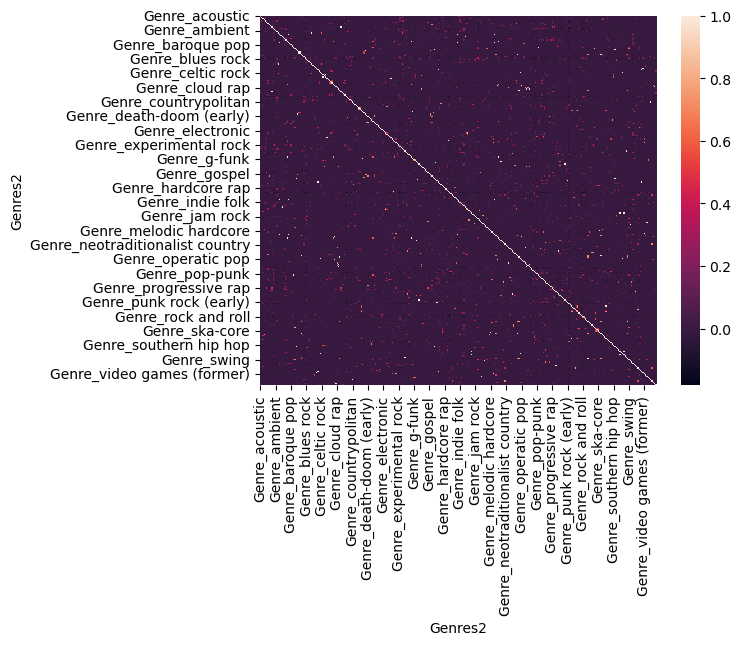

In [485]:
tbl_genres_piv.corr().to_clipboard()
sns.heatmap(tbl_genres_piv.corr())

In [656]:
top_genres = ('Genre_pop','Genre_rock','Genre_country','Genre_r&b','Genre_hip hop',
'Genre_pop rock','Genre_blues','Genre_folk','Genre_jazz','Genre_indie rock','Genre_heavy metal')
i =0
for genr in top_genres:
    print("#",i,' ',genr)
    print(pd.Series(tbl_genres_piv.corr()[(abs(tbl_genres_piv.corr().loc[genr] )>0.3) &(tbl_genres_piv.corr().loc[genr] != 1)].index))
    i+=1


# 0   Genre_pop


/var/folders/c3/4ztrwxxd5738jjdlmzlmdw800000gn/T/ipykernel_2751/514615174.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(pd.Series(tbl_genres_piv.corr()[(abs(tbl_genres_piv.corr().loc[genr] )>0.3) &(tbl_genres_piv.corr().loc[genr] != 1)].index))


Series([], Name: Genres2, dtype: object)
# 1   Genre_rock
Series([], Name: Genres2, dtype: object)
# 2   Genre_country
0    Genre_country pop
1         Genre_gospel
2     Genre_rockabilly
Name: Genres2, dtype: object
# 3   Genre_r&b
0    Genre_soul
Name: Genres2, dtype: object
# 4   Genre_hip hop
0    Genre_trap
Name: Genres2, dtype: object
# 5   Genre_pop rock
Series([], Name: Genres2, dtype: object)
# 6   Genre_blues
0    Genre_jazz
Name: Genres2, dtype: object
# 7   Genre_folk
Series([], Name: Genres2, dtype: object)
# 8   Genre_jazz
0           Genre_big band
1              Genre_blues
2     Genre_easy listening
3         Genre_show tunes
4              Genre_swing
5    Genre_traditional pop
Name: Genres2, dtype: object
# 9   Genre_indie rock
Series([], Name: Genres2, dtype: object)
# 10   Genre_heavy metal
0     Genre_glam metal
1      Genre_hard rock
2     Genre_shock rock
3    Genre_speed metal
Name: Genres2, dtype: object


In [490]:
from kmodes.kmodes import KModes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 17000.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 50, cost: 16904.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 16899.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 274, cost: 16646.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 17055.0
Best run was number 4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 16750.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 16670.0
Init: initializing centroids
Init: initializing clusters
Starting iterat

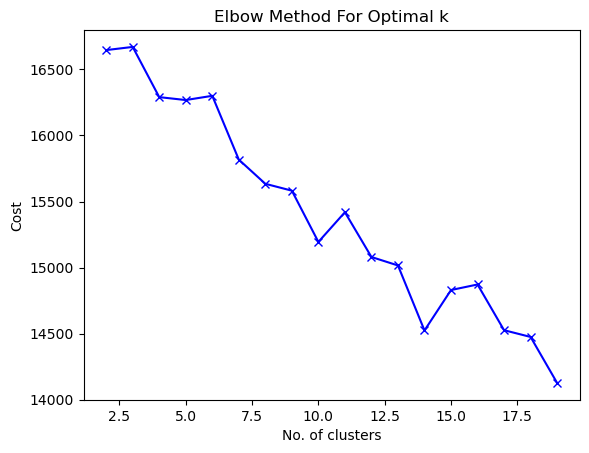

In [503]:
# Elbow curve to find optimal K
cost = []
K = range(2,20)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_artist_genre)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [504]:
kmode = KModes(n_clusters=9, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_artist_genre)
clusters

df_artist_genre.insert(0, "Cluster", clusters, True)
df_artist_genre

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 257, cost: 15830.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 350, cost: 15463.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 430, cost: 15602.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 655, cost: 15380.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 300, cost: 15498.0
Best run was number 4


,Cluster,ARTIST_NAME,Genres2
0,0,e-40,hip hop
1,0,e-40,hyphy
2,0,e-40,hip hop
3,0,e-40,hyphy
4,0,barbra streisand,broadway
...,...,...,...
9920,0,"hay, colin",country
9921,0,"hay, colin",rock
9922,1,"hay, colin",pop rock
9923,0,"hay, colin",new wave


In [509]:
from sklearn.cluster import KMeans

# Initialize
kmeans = KMeans(n_clusters=3)

# Fit
kmeans.fit(tbl_genres_piv.drop('ARTIST_NAME', axis=1))

# Predict
cluster_labels = kmeans.predict(tbl_genres_piv.drop('ARTIST_NAME', axis=1))
len(cluster_labels)

/Users/adelzel/opt/anaconda3/envs/deeplearning2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


424

In [520]:
tbl_genrest_T = tbl_genres_piv.set_index('ARTIST_NAME').T

# Initialize
kmeans = KMeans(n_clusters=10)

# Fit
kmeans.fit(tbl_genrest_T)

# Predict
cluster_labels = kmeans.predict(tbl_genrest_T)
tbl_genrest_T.insert(0, "Cluster", clusters, True)

/Users/adelzel/opt/anaconda3/envs/deeplearning2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ARTIST_NAME,Cluster,(sandy) alex g,".paak, anderson",03 greedo,5 seconds of summer,aaliyah,aaron carter,aaron neville,aaron watson,aborted,...,"winter, johnny","winwood, steve",wiz khalifa,wynonna judd,xandria,yellowcard,yo la tengo,"young, neil",zac brown band,"zappa, frank"
Genres2,,,,,,,,,,,,,,,,,,,,,
Genre_acoustic,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Genre_acoustic rock,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Genre_adult contemporary,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Genre_alternative,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Genre_alternative country,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Genre_western,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Genre_western swing,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Genre_world,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [639]:
tbl_genrest_T[tbl_genrest_T['Cluster']==4].index

Index(['Genre_folk'], dtype='object', name='Genres3')

In [500]:
df_artist_genre = vc[['ARTIST_NAME','Genres2']][~vc['Genres2'].isna()]

In [537]:
vc_genres['Genres3'] = "Genre_" + vc_genres['Genres2']

,Genres2,count,Genres3
0,,2292,Genre_
1,pop,370,Genre_pop
2,country,278,Genre_country
3,alternative rock,259,Genre_alternative rock
4,rock,209,Genre_rock
...,...,...,...
317,melodic death metal,2,Genre_melodic death metal
318,k-pop,1,Genre_k-pop
319,praise and worship,1,Genre_praise and worship
320,deathcore,1,Genre_deathcore


In [604]:
tbl_genrest_T = tbl_genres_piv.set_index('ARTIST_NAME').T.merge(vc_genres[['Genres3','count']],left_on='Genres2',right_on="Genres3",how='left')

In [605]:
tbl_genrest_T =tbl_genrest_T.set_index('Genres3')

In [606]:
#tbl_genrest_T = tbl_genrest_T.set_index('Genres2').drop('Genres3')
num_clusters = 20
# Initialize
kmeans = KMeans(n_clusters=num_clusters)

# Fit
kmeans.fit(tbl_genrest_T.drop(columns='count'),sample_weight=tbl_genrest_T['count'])

# Predict
cluster_labels = kmeans.predict(tbl_genrest_T.drop(columns='count'))


/Users/adelzel/opt/anaconda3/envs/deeplearning2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [607]:
tbl_genrest_T.insert(0, "Cluster", cluster_labels, True)
tbl_genrest_T

,Cluster,(sandy) alex g,".paak, anderson",03 greedo,5 seconds of summer,aaliyah,aaron carter,aaron neville,aaron watson,aborted,...,"winwood, steve",wiz khalifa,wynonna judd,xandria,yellowcard,yo la tengo,"young, neil",zac brown band,"zappa, frank",count
Genres3,,,,,,,,,,,,,,,,,,,,,
Genre_acoustic,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
Genre_acoustic rock,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
Genre_adult contemporary,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
Genre_alternative,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
Genre_alternative country,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Genre_western,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
Genre_western swing,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
Genre_world,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12


In [618]:
tbl_genrest_T[tbl_genrest_T['Cluster']==10].index

Index(['Genre_country'], dtype='object', name='Genres3')

In [666]:
genremapping = pd.read_csv('genremapping.csv')

In [683]:
df_OverallGenres =vc.merge(genremapping.drop(columns='count'),on="Genres2",how="right")
df_OverallGenres


,ARTIST_NAME,count,Artist,Artist_search_URL,Artist_wiki_URL,Genres_list,Genres2,Unnamed: 0,Overall_Genre
0,bill callahan,157,bill callahan,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Bill_Callahan_(A...,None,None,0,NaN
1,belle & sebastian,136,belle & sebastian,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Belle,None,None,0,NaN
2,john anderson,134,john anderson,https://en.wikipedia.org/w/api.php?action=open...,"https://en.wikipedia.org/wiki/John_Anderson,_1...",None,None,0,NaN
3,"jones, tom",125,tom jones,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Tom_jones,None,None,0,NaN
4,babyface,124,babyface,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Babyface,None,None,0,NaN
...,...,...,...,...,...,...,...,...,...
7628,in flames,58,in flames,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/In_Flames,"Melodic death metal,alternative metal",melodic death metal,317,NaN
7629,b1a4,83,b1a4,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/B1A4,K-pop,k-pop,318,NaN
7630,hillsong worship,54,hillsong worship,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Hillsong_Worship,Praise and worship,praise and worship,319,NaN
7631,thy art is murder,55,thy art is murder,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Thy_Art_Is_Murder,Deathcore,deathcore,320,NaN


In [684]:
df_OverallGenres = df_OverallGenres[~df_OverallGenres['Overall_Genre'].isna()].drop(columns={"Unnamed: 0"})

In [687]:
df_OverallGenres

,ARTIST_NAME,count,Artist,Artist_search_URL,Artist_wiki_URL,Genres_list,Genres2,Overall_Genre
79,beach boys,254,beach boys,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Beach_boys,"Rock,pop,surf,psychedelia",pop,pop
80,beach boys,254,beach boys,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Beach_boys,"Rock,pop,surf,psychedelia",pop,pop
81,beach boys,254,beach boys,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Beach_boys,"Rock,pop,surf,psychedelia",pop,pop
82,beach boys,254,beach boys,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Beach_boys,"Rock,pop,surf,psychedelia",pop,pop
83,bee gees,250,bee gees,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Bee_Gees,"Pop,soul,disco,rock,soft rock,",pop,pop
...,...,...,...,...,...,...,...,...
7594,rotting christ,62,rotting christ,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Rotting_Christ,"Black metal, gothic metal, death metal (early)",black metal,hard rock
7595,rotting christ,62,rotting christ,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Rotting_Christ,"Black metal, gothic metal, death metal (early)",black metal,hard rock
7602,jamie cullum,67,jamie cullum,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Jamie_Cullum,"Vocal jazz,jazz-pop,swing",vocal jazz,jazz
7603,jamie cullum,67,jamie cullum,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Jamie_Cullum,"Vocal jazz,jazz-pop,swing",vocal jazz,jazz


In [686]:
vc

,ARTIST_NAME,count,Artist,Artist_search_URL,Artist_wiki_URL,Genres_list,Genres2
0,e-40,500,e-40,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/E-40,"Hip hop,hyphy",hip hop
1,e-40,500,e-40,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/E-40,"Hip hop,hyphy",hyphy
2,e-40,500,e-40,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/E-40,"Hip hop,hyphy",hip hop
3,e-40,500,e-40,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/E-40,"Hip hop,hyphy",hyphy
4,barbra streisand,405,barbra streisand,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Barbra_Streisand,"Broadway,traditional pop,disco",broadway
...,...,...,...,...,...,...,...
9920,"hay, colin",51,colin hay,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Colin_Hay,"Rock,pop rock,new wave,country",country
9921,"hay, colin",51,colin hay,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Colin_Hay,"Rock,pop rock,new wave,country",rock
9922,"hay, colin",51,colin hay,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Colin_Hay,"Rock,pop rock,new wave,country",pop rock
9923,"hay, colin",51,colin hay,https://en.wikipedia.org/w/api.php?action=open...,https://en.wikipedia.org/wiki/Colin_Hay,"Rock,pop rock,new wave,country",new wave


In [690]:
tbl_genres_piv = pd.pivot_table(df_OverallGenres,values='count', index=['ARTIST_NAME'],columns=['Overall_Genre'], aggfunc=len)
tbl_genres_piv.columns


Index(['alternative rock', 'blues', 'ccm', 'country', 'folk', 'hard rock',
       'hip hop', 'jazz', 'new wave', 'pop', 'pop rock', 'r&b', 'rock'],
      dtype='object', name='Overall_Genre')

In [693]:
#dropping nonsense genres 
tbl_genres_piv = tbl_genres_piv.reset_index()
tbl_genres_piv

Overall_Genre,ARTIST_NAME,alternative rock,blues,ccm,country,folk,hard rock,hip hop,jazz,new wave,pop,pop rock,r&b,rock
0,(sandy) alex g,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,".paak, anderson",NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,5.0,NaN,5.0,NaN
2,03 greedo,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3,5 seconds of summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,5.0,NaN,NaN
4,aaliyah,NaN,6.0,NaN,NaN,NaN,NaN,6.0,6.0,NaN,6.0,NaN,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,yellowcard,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
406,yo la tengo,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,7.0
407,"young, neil",3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
408,zac brown band,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0


In [694]:
for col in tbl_genres_piv.columns:
    if col != 'ARTIST_NAME':
        #Make simple True/False matrix
        tbl_genres_piv.loc[~tbl_genres_piv[col].isna(),col] = 1
        tbl_genres_piv[col] = tbl_genres_piv[col].fillna(0)

        #rename columns so they'll be called "Genre_rock" for eg. 
        tbl_genres_piv.rename(columns={col:"Genre_"+col},inplace=True)
        
tbl_genres_piv

Overall_Genre,ARTIST_NAME,Genre_alternative rock,Genre_blues,Genre_ccm,Genre_country,Genre_folk,Genre_hard rock,Genre_hip hop,Genre_jazz,Genre_new wave,Genre_pop,Genre_pop rock,Genre_r&b,Genre_rock
0,(sandy) alex g,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,".paak, anderson",0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,03 greedo,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5 seconds of summer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,aaliyah,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,yellowcard,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
406,yo la tengo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
407,"young, neil",1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
408,zac brown band,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [695]:
#don't use artists which we didn't get the genre
df_wGenres = df.merge(tbl_genres_piv,on='ARTIST_NAME',how='right')

In [769]:
df_OverallGenres.groupby(by='Overall_Genre').count()['ARTIST_NAME']

df_OverallGenres.groupby(by='Overall_Genre').count().index

Index(['alternative rock', 'blues', 'ccm', 'country', 'folk', 'hard rock',
       'hip hop', 'jazz', 'new wave', 'pop', 'pop rock', 'r&b', 'rock'],
      dtype='object', name='Overall_Genre')

In [811]:
df_OverallGenres
plt.figure(figsize=(12,6))

plt.bar(
df_OverallGenres.groupby(by='Overall_Genre').count().index, 
df_OverallGenres.groupby(by='Overall_Genre').count()['ARTIST_NAME'])
plt.show()

KeyError: 'Overall_Genre'

<Figure size 1200x600 with 0 Axes>

## Part 3. Transforming Lyrics via NLP

In [696]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [697]:
df.iloc[0,3]
df_wGenres

,ARTIST_NAME,ARTIST_URL,SONG_NAME,SONG_URL,LYRICS,lang,Genre_alternative rock,Genre_blues,Genre_ccm,Genre_country,Genre_folk,Genre_hard rock,Genre_hip hop,Genre_jazz,Genre_new wave,Genre_pop,Genre_pop rock,Genre_r&b,Genre_rock
0,(sandy) alex g,https://www.azlyrics.com/s/sandyalexg.html,remember,https://www.azlyrics.com/lyrics/sandyalexg/rem...,"i've come here to kill my maker, cause i'd fee...",en,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,(sandy) alex g,https://www.azlyrics.com/s/sandyalexg.html,the same,https://www.azlyrics.com/lyrics/sandyalexg/the...,"i was a girl, i was the only kid in the world ...",en,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,(sandy) alex g,https://www.azlyrics.com/s/sandyalexg.html,tv,https://www.azlyrics.com/lyrics/sandyalexg/tv....,i get feelings from the tv they can't hurt me ...,en,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(sandy) alex g,https://www.azlyrics.com/s/sandyalexg.html,gnaw,https://www.azlyrics.com/lyrics/sandyalexg/gna...,"yeah, you were scarred, and you were cryin' lo...",en,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,(sandy) alex g,https://www.azlyrics.com/s/sandyalexg.html,trash,https://www.azlyrics.com/lyrics/sandyalexg/tra...,"wound up tight i'll, spend the night, i never ...",en,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34425,"zappa, frank",https://www.azlyrics.com/f/frankzappa.html,be in my video,https://www.azlyrics.com/lyrics/frankzappa/bei...,"be in my video, darling, every night, i will r...",en,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
34426,"zappa, frank",https://www.azlyrics.com/f/frankzappa.html,the deathless horsie,https://www.azlyrics.com/lyrics/frankzappa/the...,ngh.,en,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
34427,"zappa, frank",https://www.azlyrics.com/f/frankzappa.html,the jimmy carl black philosophy lesson,https://www.azlyrics.com/lyrics/frankzappa/the...,at this very moment jimmy carl black the india...,en,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
34428,"zappa, frank",https://www.azlyrics.com/f/frankzappa.html,"food gathering in post-industrial america, 1992",https://www.azlyrics.com/lyrics/frankzappa/foo...,when the last decrepit factory has dumped its ...,en,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [698]:
df_wGenres = df_wGenres[~df_wGenres['LYRICS'].isna()]

In [699]:
#Time it takes to run: 1 minute
#Break down Lyrics into words
tfidf = TfidfVectorizer(min_df=20,ngram_range=(1,3)).fit(df_wGenres["LYRICS"])
small_transformed = tfidf.transform(df_wGenres["LYRICS"])

my_df = pd.DataFrame(columns=tfidf.get_feature_names_out(), data=small_transformed.toarray())
display(my_df)

,00,000,03,05,10,100,100k,11,12,13,...,zero,zig,zion,zip,zombie,zombies,zone,zones,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=tfidf.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 highest weighted words by TF-IDF")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=45)
plt.show()

In [728]:
import string
print(string.punctuation)
# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 

stemmer = nltk.stem.PorterStemmer()
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adelzel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [729]:
my_tokenizer("the quick brown over the lazy dog")


['quick', 'brown', 'lazi', 'dog']

### 3.1 Adding in Sentiment scores

In [662]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adelzel/nltk_data...


True

In [665]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


#create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment




# apply get_sentiment function

df_wGenres["LYRICS"].head(3).apply(get_sentiment)


0    1
1    0
2    1
Name: LYRICS, dtype: int64

# Part 4: Modeling 

- KNN
- Naive Bayes
- Decision Trees
- Boosted Decision trees

In [746]:
df_wGenres.ARTIST_NAME.value_counts()

e-40                 500
barbra streisand     405
johnny cash          255
beach boys           254
bee gees             250
                    ... 
before their eyes     51
williams, jeff        51
toby keith            51
hay, colin            51
springfield, rick     51
Name: ARTIST_NAME, Length: 410, dtype: int64

In [815]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X = df_wGenres["LYRICS"]
y = df_wGenres['Genre_pop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [816]:
#Time this takes: 3 min
# using our custom tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(min_df=20,ngram_range=(1,3),tokenizer=my_tokenizer)
tfidf.fit(X_train)

X_train_transformed = tfidf.transform(X_train)
X_test_transformed = tfidf.transform(X_test)

X_train_transformed.shape

/Users/adelzel/opt/anaconda3/envs/deeplearning2/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(23065, 15727)

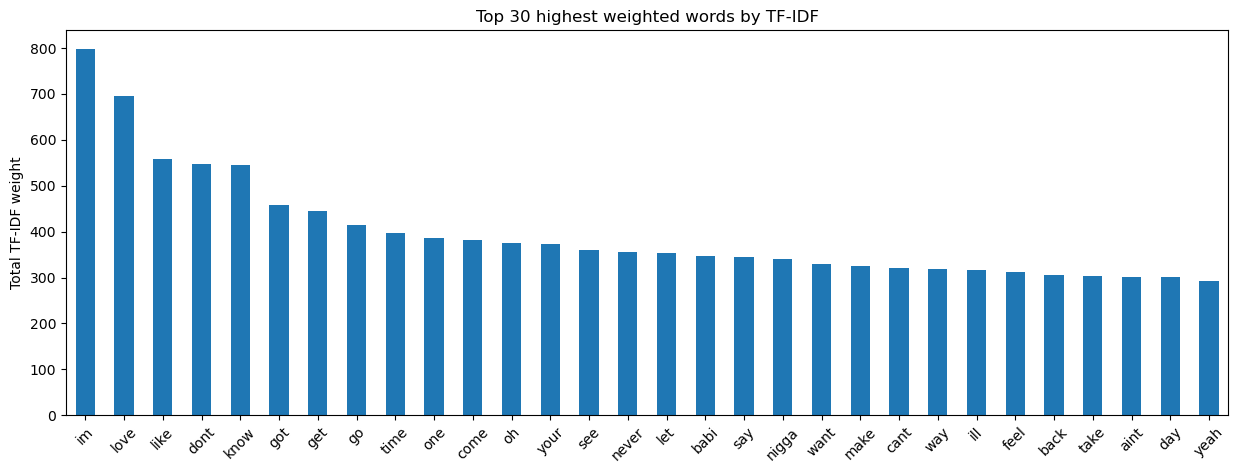

In [731]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=tfidf.get_feature_names_out()

).sort_values("counts", ascending=False)

word_counts.head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 30 highest weighted words by TF-IDF")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=45)
plt.show()

### Pop only

In [732]:
X_train_transformed = tfidf.transform(X_train[df_wGenres['Genre_pop']==1])

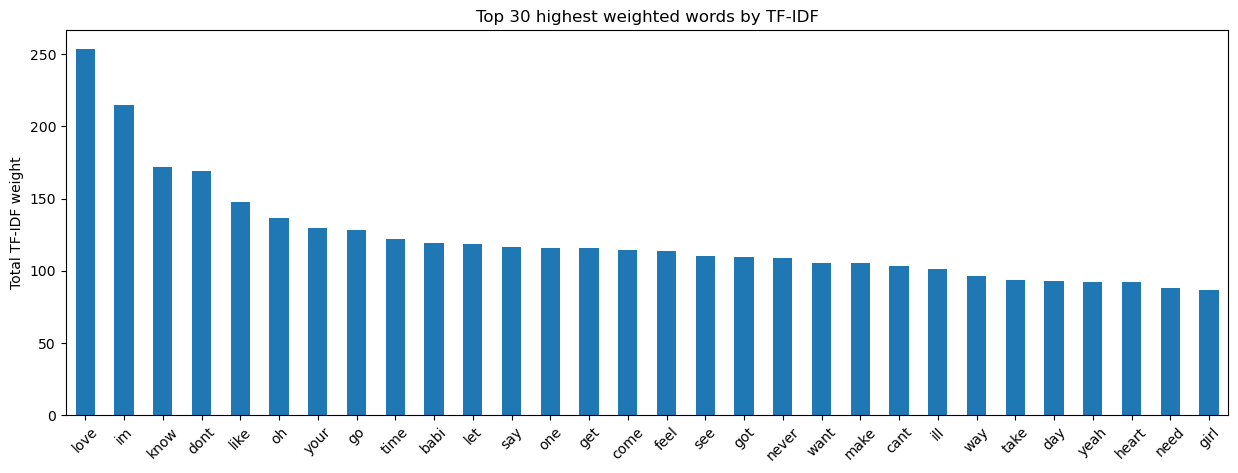

In [733]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=tfidf.get_feature_names_out()

).sort_values("counts", ascending=False)

word_counts.head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 30 highest weighted words by TF-IDF")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=45)
plt.show()

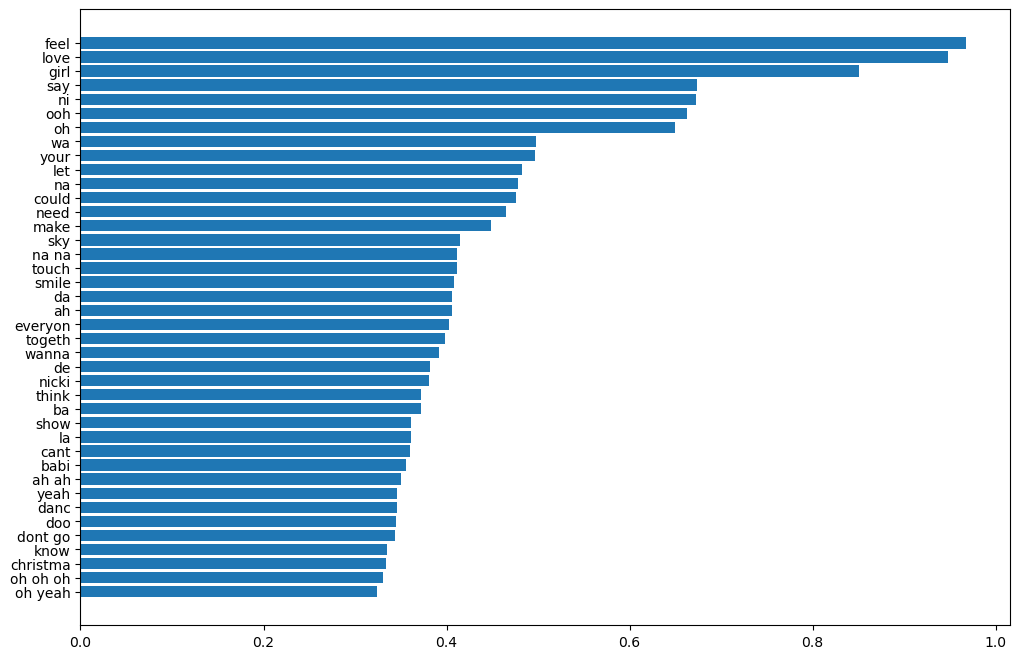

In [819]:
coef_table = pd.DataFrame(list(tfidf.get_feature_names_out())).copy()
coef_table.insert(len(coef_table.columns),"Coefs",logreg.coef_.transpose())
coef_table.sort_values('Coefs').tail(40)

plt.figure(figsize=(12,8))

plt.barh(
coef_table.sort_values('Coefs').tail(40)[0], 
coef_table.sort_values('Coefs').tail(40)['Coefs'])
plt.show()

In [812]:
from sklearn.tree import DecisionTreeClassifier
# Random seed for reproducibility
np.random.seed(123)

# Fitting a model
dect = DecisionTreeClassifier(max_depth=3)
dect.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {dect.score(X_train_transformed, y_train)}")
print(f"Test score: {dect.score(X_test_transformed, y_test)}")

Train score: 0.7020593973553002
Test score: 0.6980899568699939


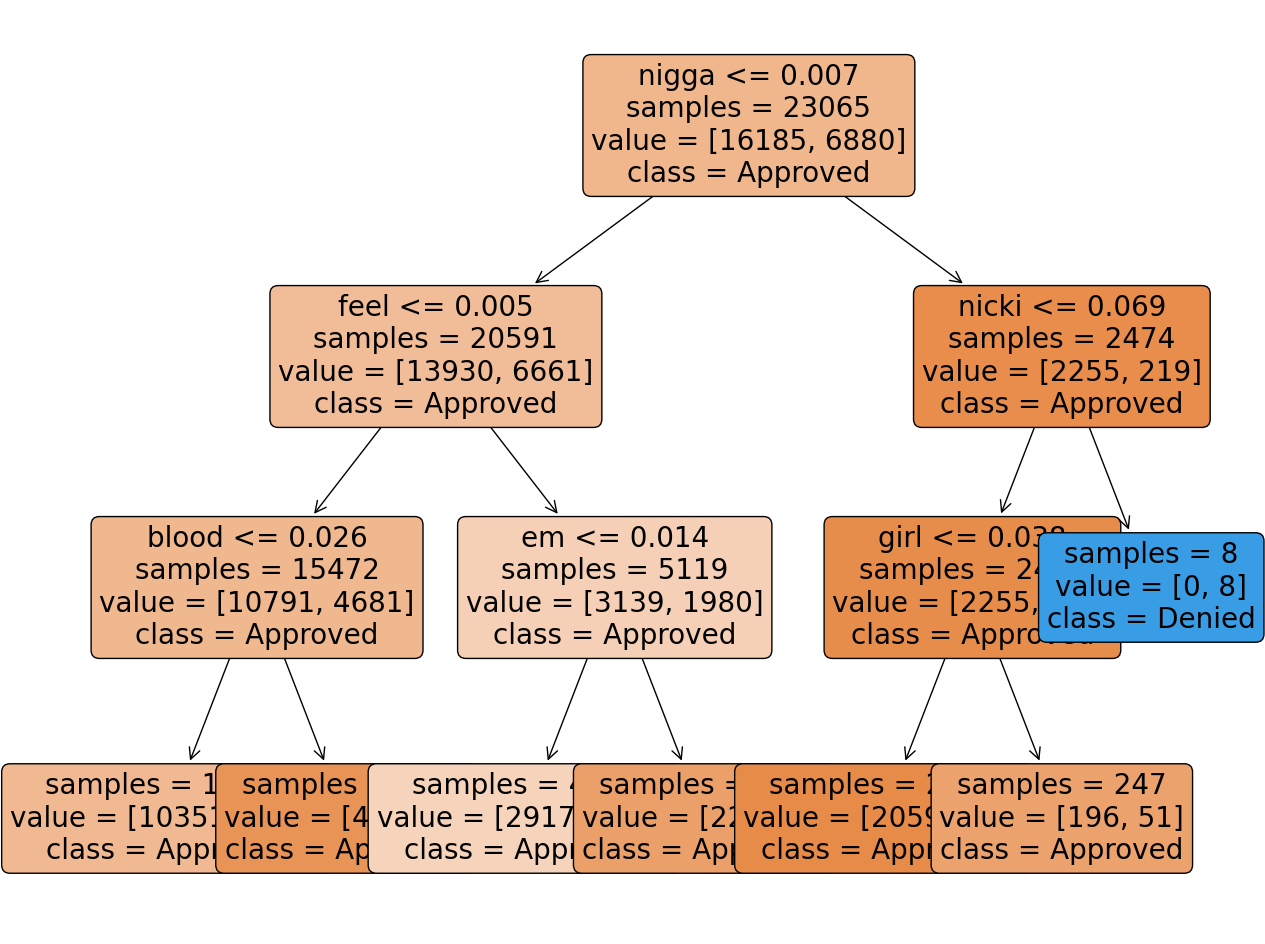

In [813]:
plt.figure(figsize=(15,12))
plot_tree(dect, 
          feature_names=tfidf.get_feature_names_out(), 
          class_names=["Approved", "Denied", "In Review"],
          fontsize=20,
          rounded=True,
          impurity=False,
          filled=True);
plt.show()

In [734]:
X_train_transformed = tfidf.transform(X_train[df_wGenres['Genre_country']==1])

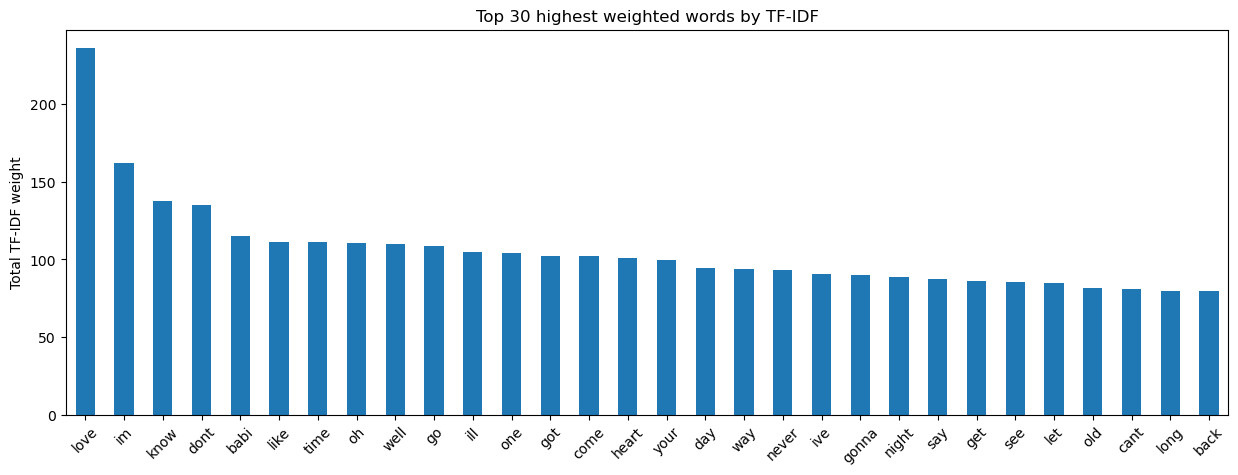

In [735]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=tfidf.get_feature_names_out()

).sort_values("counts", ascending=False)

word_counts.head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 30 highest weighted words by TF-IDF")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=45)
plt.show()

In [708]:
from sklearn.linear_model import LogisticRegression

In [818]:
# Random seed for reproducibility
np.random.seed(123)

# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.7039236939085194
Test score: 0.6993222427603204


In [ ]:
coef_table.sort_values('Coefs').tail(20)

plt.figure(figsize=(12,8))

plt.barh(
coef_table.sort_values('Coefs').tail(40)[0], 
coef_table.sort_values('Coefs').tail(40)['Coefs'])
plt.show()

In [776]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X = df_wGenres["LYRICS"]
y = df_wGenres['Genre_country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [777]:
# using our custom tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(min_df=20,ngram_range=(1,3))
tfidf.fit(X_train)

X_train_transformed = tfidf.transform(X_train)
X_test_transformed = tfidf.transform(X_test)

X_train_transformed.shape

(23065, 35881)

In [742]:
# Random seed for reproducibility
np.random.seed(123)

# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")


Train score: 0.7359202254498157
Test score: 0.7356746765249538


In [745]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = logreg.predict(X_test_transformed)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 

    index=["True Non-Country", "True Fraudulent"]
)

display(cf_df)

,0,1
True Non-Country,8298,20
True Country,2983,60


In [779]:
from sklearn.tree import DecisionTreeClassifier
# Random seed for reproducibility
np.random.seed(123)

# Fitting a model
dect = DecisionTreeClassifier(max_depth=3)
dect.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {dect.score(X_train_transformed, y_train)}")
print(f"Test score: {dect.score(X_test_transformed, y_test)}")


Train score: 0.733318881422068
Test score: 0.7311856350673356


In [780]:
from sklearn.tree import plot_tree

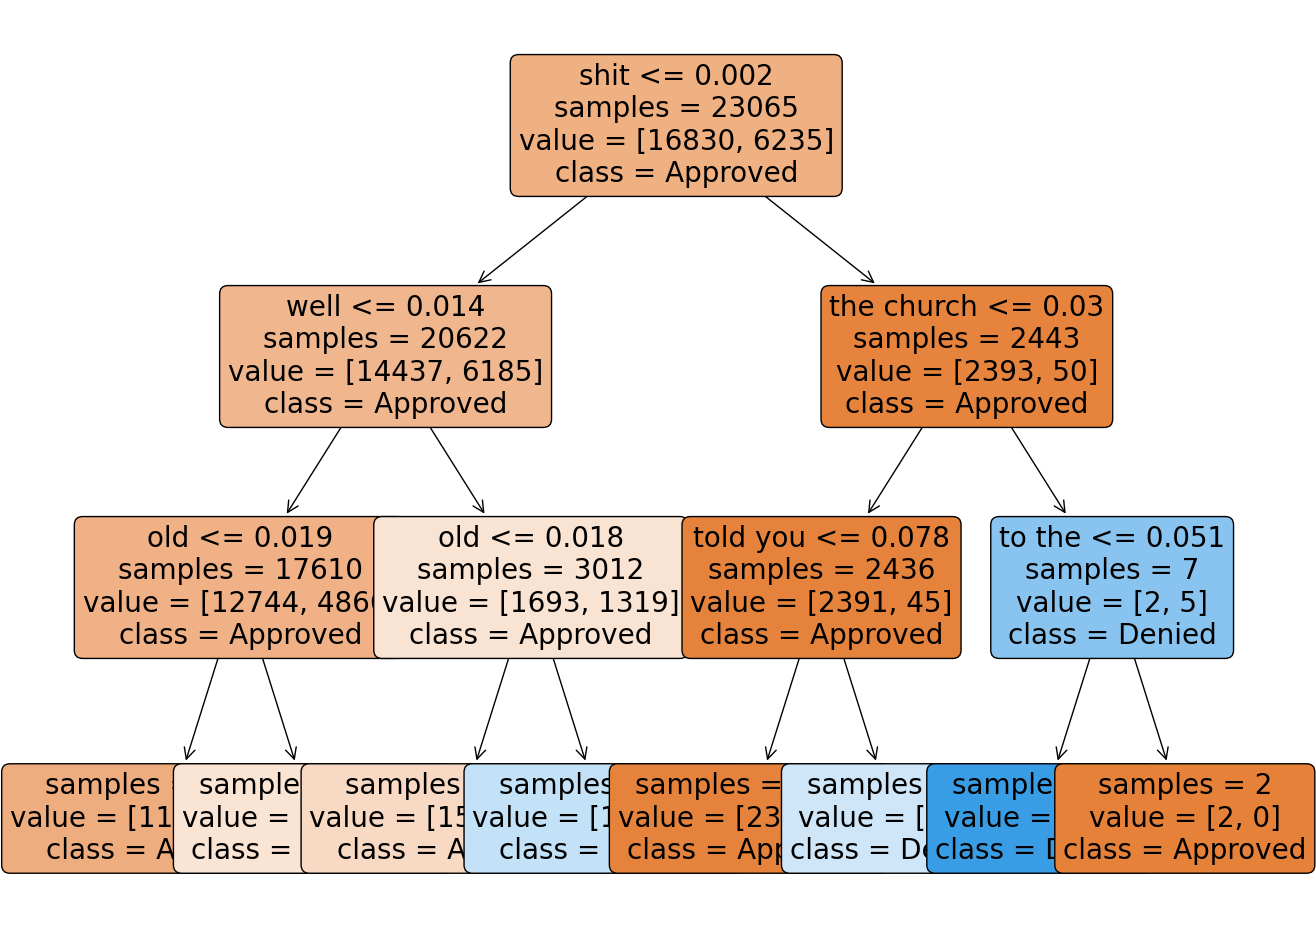

In [808]:
plt.figure(figsize=(15,12))
plot_tree(dect, 
          feature_names=tfidf.get_feature_names_out(), 
          class_names=["Approved", "Denied", "In Review"],
          fontsize=20,
          rounded=True,
          impurity=False,
          filled=True);
plt.show()

In [799]:
dect.decision_path.

<bound method BaseDecisionTree.decision_path of DecisionTreeClassifier(max_depth=3)>

In [762]:
X_train_transformed

<3535x35881 sparse matrix of type '<class 'numpy.float64'>'
	with 709652 stored elements in Compressed Sparse Row format>

In [791]:
coef_table = pd.DataFrame(list(tfidf.get_feature_names_out())).copy()
coef_table.insert(len(coef_table.columns),"Coefs",logreg.coef_.transpose())
coef_table.sort_values('Coefs').tail(40)

,0,Coefs
5253,christmas,0.551762
7732,ever,0.553086
7440,each,0.553806
32969,where,0.557666
2053,as,0.559772
17731,morning,0.563839
24755,somewhere,0.570308
22620,river,0.571932
23557,she,0.573120
28263,there,0.579745


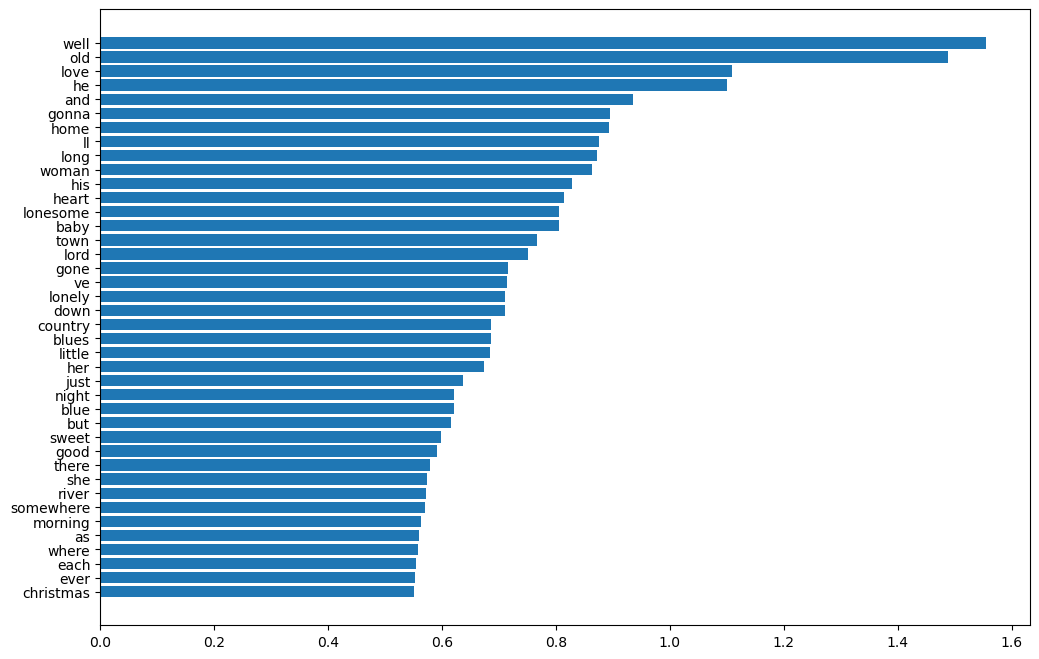

In [797]:
coef_table = pd.DataFrame(list(tfidf.get_feature_names_out())).copy()
coef_table.insert(len(coef_table.columns),"Coefs",logreg.coef_.transpose())
coef_table.sort_values('Coefs').tail(40)

plt.figure(figsize=(12,8))

plt.barh(
coef_table.sort_values('Coefs').tail(40)[0], 
coef_table.sort_values('Coefs').tail(40)['Coefs'])
plt.show()